In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../')
import json
from modules import dataFrame, dataHandler
import numpy as np
import scienceplots
import scipy.optimize as opt
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

datafolder_path = "../data"
LVDT_data_files = dataFrame.LVDT_data_files
VC_data_files = dataFrame.VC_data_files
Magnet_data_files = dataFrame.Magnet_data_files

### LVDT analysis - (Aluminum cylinder + magnet core) thickness check

In [2]:
jsonfile_path = "../json/lvdt_data_aluminum_cylinder_thickness.json"
data = dataHandler.get_data_from_json(datafolder_path = datafolder_path, jsonfile_path=jsonfile_path)
data_keys = data.keys()
# for key in data_keys:
#     print(key)
aircoil_data = data['LVDT_aircoil']
lvdt_od08_data = data['LVDT_alucld_od08']
lvdt_od10_data = data['LVDT_alucld_od10']
lvdt_od12_data = data['LVDT_alucld_od12']
lvdt_od14_data = data['LVDT_alucld_od14']
lvdt_od08_mag_data = data['LVDT_alucld_od08_magcore_d04_l06']
lvdt_od10_mag_data = data['LVDT_alucld_od10_magcore_d04_l06']
lvdt_od12_mag_data = data['LVDT_alucld_od12_magcore_d04_l06']
lvdt_od14_mag_data = data['LVDT_alucld_od14_magcore_d04_l06']

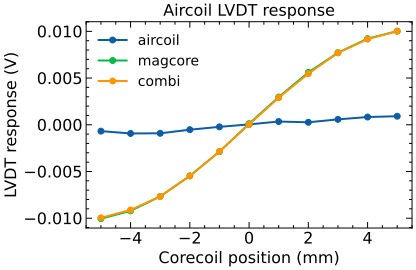

In [5]:
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(6,4))
for key in aircoil_data:
    data = aircoil_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], 'o-', label=key)
plt.title('Aircoil LVDT response')
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.legend(fontsize = 14)
plt.tight_layout()

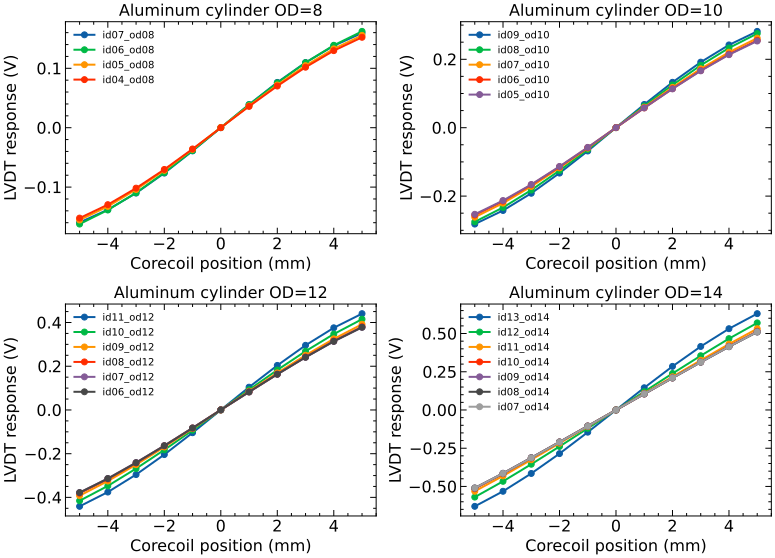

In [6]:
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(11, 8))
plt.subplot(2,2,1)
for key in lvdt_od08_data:
    data = lvdt_od08_data[key]
    position = data['CC_pos']
    plt.plot(position, data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=8')

plt.subplot(2,2,2)
for key in lvdt_od10_data:
    data = lvdt_od10_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=10')

plt.subplot(2,2,3)
for key in lvdt_od12_data:
    data = lvdt_od12_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=12')

plt.subplot(2,2,4)
for key in lvdt_od14_data:
    data = lvdt_od14_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Corecoil position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('Aluminum cylinder OD=14')
plt.tight_layout()

### LVDT analysis - (Magnet only) diameter and length check

In [3]:
mag_jsonfile_path = "../json/lvdt_data_magnet_length.json"
mag_data = dataHandler.get_data_from_json(datafolder_path = datafolder_path, jsonfile_path=mag_jsonfile_path)
LVDT_magcore_d5_data = mag_data['LVDT_magcore_d05']
LVDT_magcore_d6_data = mag_data['LVDT_magcore_d06']
LVDT_magcore_d7_data = mag_data['LVDT_magcore_d07']
LVDT_magcore_d8_data = mag_data['LVDT_magcore_d08']

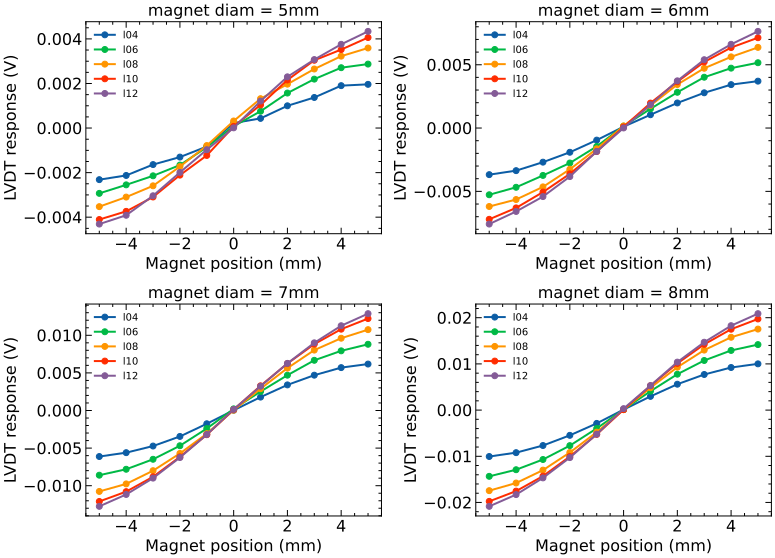

In [9]:
plt.style.use(['science','no-latex','notebook'])
plt.figure(figsize=(11, 8))
plt.subplot(2,2,1)
for key in LVDT_magcore_d5_data:
    data = LVDT_magcore_d5_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 5mm')

plt.subplot(2,2,2)
for key in LVDT_magcore_d6_data:
    data = LVDT_magcore_d6_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 6mm')

plt.subplot(2,2,3)
for key in LVDT_magcore_d7_data:
    data = LVDT_magcore_d7_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 7mm')

plt.subplot(2,2,4)
for key in LVDT_magcore_d8_data:
    data = LVDT_magcore_d8_data[key]
    plt.plot(data['CC_pos'], data['MC_volt_abs'], marker = 'o', markersize = 6, label=key)
plt.legend(fontsize = 10)
plt.xlabel('Magnet position (mm)')
plt.ylabel('LVDT response (V)')
plt.title('magnet diam = 8mm')

plt.tight_layout()

### LinearFit 

Optimal parameters: [ 1.70073461 -0.00343639]


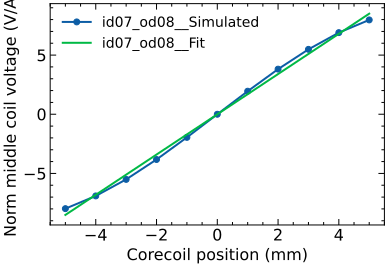

Optimal parameters: [1.71275275e+00 3.78395886e-04]


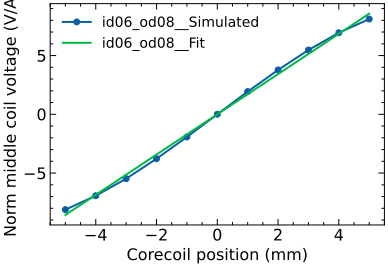

Optimal parameters: [1.63724991 0.00597269]


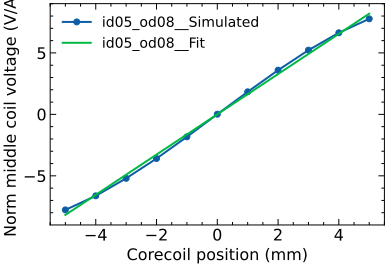

Optimal parameters: [1.60106377e+00 6.37632147e-04]


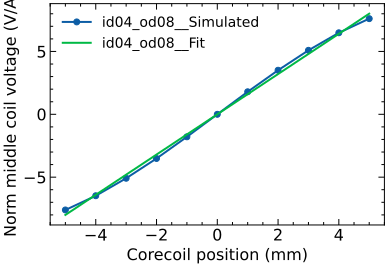

In [5]:
target = lvdt_od08_data
for key in target:
    data  = target[key]
    norm_factor = 0.02
    Gain = 70 
    def linfunc(x, a, b):
        return a*x + b
    plt.style.use(['science','no-latex','notebook'])
    popt, pcov = opt.curve_fit(linfunc, data['CC_pos'], data['MC_volt_abs']/norm_factor)
    fitted_data = linfunc(data['CC_pos'], *popt)
    print('Optimal parameters:', popt)
    plt.figure(figsize=(6,4))
    plt.plot(data['CC_pos'], data['MC_volt_abs']/norm_factor, 'o-', label=key + '__Simulated', )
    plt.plot(data['CC_pos'], fitted_data, label=key + '__Fit')
    plt.xlabel('Corecoil position (mm)')
    plt.ylabel('Norm middle coil voltage (V/A)')
    # the response is the slope value with the unit V/mmA
    # plt.title('Fitted response of MC (Gain=70):' f'{opt_params[0]*Gain:.2f} V/mmA', fontsize = 12) 
    plt.legend(fontsize = 14)
    plt.show()